# Part 3 Data Analytics  
## Step 1: Select a real-world dataset  
Based on the coursework requirements, I browsed many APIs in https://github.com/discdiver/list-of-python-api-wrappers. I was most interested in the subject of world weather, because since I came here I have found that due to the influence of the ocean and monsoon, even cities at the same latitude have different climates. For example, Beijing and Istanbul have basically the same latitude, but the climate of Beijing is temperate monsoon climate and the climate of Istanbul is a Mediterranean climate. Therefore, I collected weather data of Beijing and Istanbul to further explore the climate differences between cities at the same latitude and to verfity whether the data matches their climate characteristics or not. I reffered to the existing world weather API examples on github. Code show as below:

In [2]:
import math
import pandas as pd
import os
import matplotlib.pyplot as plt
from wwo_hist import retrieve_hist_data


os.chdir("C:\\Users\\Administrator\\Desktop\\Btistol")
frequency=24
start_date = '1-JAN-2020'
end_date = '31-DEC-2020'
api_key = 'd6a695a56a3a43a0a29234625211601'
location_list = ['beijing','istanbul'] #They are almost at the same latitude but the climate is very different

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for beijing


Currently retrieving data for beijing: from 2020-01-01 to 2020-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.716609
Currently retrieving data for beijing: from 2020-02-01 to 2020-02-29
Time elapsed (hh:mm:ss.ms) 0:00:03.078769
Currently retrieving data for beijing: from 2020-03-01 to 2020-03-31
Time elapsed (hh:mm:ss.ms) 0:00:04.767094
Currently retrieving data for beijing: from 2020-04-01 to 2020-04-30
Time elapsed (hh:mm:ss.ms) 0:00:06.274468
Currently retrieving data for beijing: from 2020-05-01 to 2020-05-31
Time elapsed (hh:mm:ss.ms) 0:00:08.126424
Currently retrieving data for beijing: from 2020-06-01 to 2020-06-30
Time elapsed (hh:mm:ss.ms) 0:00:09.617134
Currently retrieving data for beijing: from 2020-07-01 to 2020-07-31
Time elapsed (hh:mm:ss.ms) 0:00:11.176862
Currently retrieving data for beijing: from 2020-08-01 to 2020-08-31
Time elapsed (hh:mm:ss.ms) 0:00:12.724350
Currently retrieving data for beijing: from 2020-09-01 to 2020-09-30
Tim

## Step 2: Perform data preparation & cleaning  
Because this data was clean data, I didn't clean it again. In order to facilitate subsequent analysis, add another column named "ave_temp" to each data set, which represents the average temperature. Code show as below:

In [5]:
df_BJ = pd.read_csv("C:\\Users\\Administrator\\Desktop\\Btistol\\beijing.csv")
df_IB = pd.read_csv("C:\\Users\\Administrator\\Desktop\\Btistol\\istanbul.csv")


ave_temp_BJ = (df_BJ["maxtempC"] + df_BJ["mintempC"]) /2
df_BJ["temp_differ"] = temp_differ_BJ
df_BJ["ave_temp"] = ave_temp_BJ


ave_temp_IB = (df_IB["maxtempC"] + df_IB["mintempC"]) /2
df_IB["temp_differ"] = temp_differ_IB
df_IB["ave_temp"] = ave_temp_IB

## Step 3: Perform exploratory analysis and ask questions  
### Question 1: What is the difference in temperature between the two cities？  


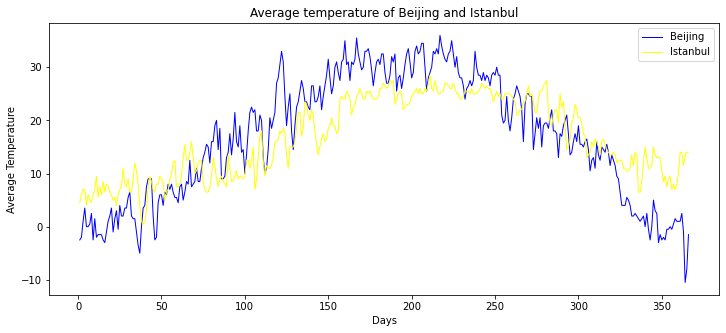

In [12]:
fig = plt.figure(figsize=(12,5))
x1 = range(1,367)
y1 = df_BJ["ave_temp"]
plt.plot(x1, y1, color = "blue", label = "Beijing", linewidth=1)

y2 = df_IB["ave_temp"]
plt.plot(x1, y2, color="yellow", label ="Istanbul", linewidth=1 )

plt.xlabel("Days") 
plt.ylabel("Average Temperature")
plt.title("Average temperature of Beijing and Istanbul")
plt.legend(loc = 0, ncol = 1)
plt.show()

It is generally agreed that the average temperature should be used to represent the temperature of the day. So I drawed a line chart based on the collected data. From the line chart, I found that the trends of the two lines are relatively similar and both of them gradually rise after March. However, Istanbul’s temperature was higher than Beijing’s before March and after October obviously. Therefore, it could be concluded that Beijing is a city with four distinct seasons while Istanbul is a city that is neither too cold in winter nor too hot in summer.

### Question 2: What are the characteristics of rainfall in the two cities?

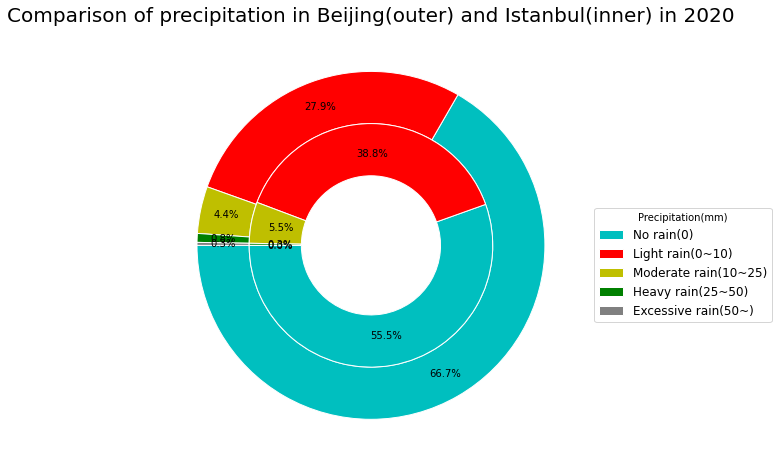

In [9]:
precip_BJ=df_BJ["precipMM"]
zero_rain_BJ= sum(i==0 for i in precip_BJ)
light_rain_BJ= sum(i>0 and i<10 for i in precip_BJ)
moderate_rain_BJ= sum(i>=10 and i<25 for i in precip_BJ)
heavy_rain_BJ= sum(i>=25 and i<50 for i in precip_BJ)
excessive_rain_BJ= sum(i>=50 for i in precip_BJ)

precip_BJ=df_IB["precipMM"]
zero_rain_IB= sum(i==0 for i in precip_BJ)
light_rain_IB= sum(i>0 and i<10 for i in precip_BJ)
moderate_rain_IB= sum(i>=10 and i<25 for i in precip_BJ)
heavy_rain_IB= sum(i>=25 and i<50 for i in precip_BJ)
excessive_rain_IB= sum(i>=50 for i in precip_BJ)

plt.figure(figsize = (10, 8))


labels = ['No rain(0)', 'Light rain(0~10)', 'Moderate rain(10~25)', 'Heavy rain(25~50)', 'Excessive rain(50~)']
rain_BJ = [zero_rain_BJ, light_rain_BJ, moderate_rain_BJ, heavy_rain_BJ, excessive_rain_BJ]
rain_IB = [zero_rain_IB, light_rain_IB, moderate_rain_IB, heavy_rain_IB, excessive_rain_IB]
colors = ['c', 'r', 'y', 'g', 'gray']

# outer ring
wedges1, texts1, autotexts1 = plt.pie(rain_BJ,
    autopct = '%0.1f%%',
    radius = 1,
    pctdistance = 0.85,
    colors = colors,
    startangle = 180,
    textprops = {'color': 'k'},
    wedgeprops = {'width': 0.3, 'edgecolor': 'w'}
)

# inner ring
wedges2, texts2, autotexts2 = plt.pie(rain_IB,
    autopct = '%0.1f%%',
    radius = 0.7,
    pctdistance = 0.75,
    colors = colors,
    startangle = 180,
    textprops = {'color': 'k'},
    wedgeprops = {'width': 0.3, 'edgecolor': 'w'}
)

plt.legend(wedges1,
          labels,
          fontsize = 12,
          title = 'Precipitation(mm)',
          loc = 0,
          bbox_to_anchor = (1, 0.6))

plt.title('Comparison of precipitation in Beijing(outer) and Istanbul(inner) in 2020', fontsize=20)

plt.show()

The outer ring of this doughnut represents Beijing and the inner ring represents Istanbul. It is clear that the precipitation in Beijing is significantly less than in Istanbul. For the rainfall above 10mm, there is little difference between the two, but the rainfall below 10mm in Istanbul has significantly more time than Beijing. It may be perceived that the winter monsoon is weakened due to China's topography being high in the west and low in the east, resulting in reduced rainfall. On the contrast, due to Istanbul’s close proximity to the Mediterranean Sea, it is controlled by the westerly zone in winter and frequent frontal cyclones have resulted in abundant precipitation.

### Question 3: What are the characteristics of wind speed in these two cities?

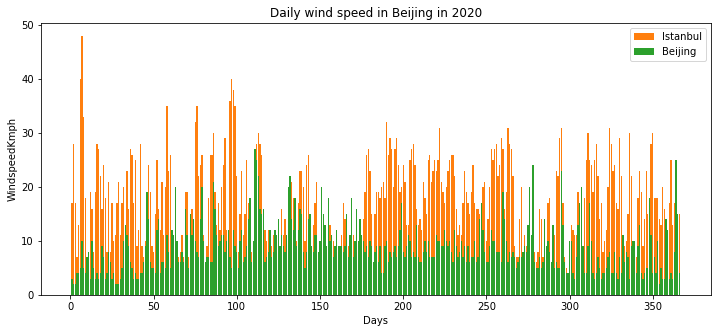

In [14]:
fig = plt.figure(figsize=(12,5))
x1 = range(1,367)
y1 = df_BJ["windspeedKmph"]
plt.bar(x1, y1)

x2 = range(1,367)
y2 = df_IB["windspeedKmph"]
plt.bar(x2, y2, label='Istanbul')
plt.bar(x1, y1, label='Beijing')


plt.xlabel("Days") 
plt.ylabel("WindspeedKmph")
plt.title("Daily wind speed in Beijing in 2020")
plt.legend(loc = 0, ncol = 1)

plt.show()

This chart shows that the average wind speed in Beijing is lower than that in Istanbul obviously, where the wind speed in Beijing is below 10 kmph most of the year but the wind speed in Istanbul is only below 10kmph for half a year. In addition, it seems that the wind speed in Beijing is greatly affected by the season, specifically the high wind speed in spring and winter, low wind speed in summer and autumn. However, this does not match the characteristics of the temperate monsoon climate where the high wind speed should appear in summer and winter and low wind speed should appear in spring and autumn. This may be because the chart only contains data for one year and is not universal. As for Istanbul, Istanbul has abundant rainfall throughout the year, which is in line with the characteristics of the Mediterranean climate.

## Step 4: Summary and conclusion  
First, it is no necessary to understand how the API is implemented. As a user, what you need to know is how to get the data you want. In this case, I imitated the example on github to collect the weather data of Beijing and Istanbul and easily got it as csv format. Second, data preprocessing can not only clear the noise data, but also ensure the integrity of the data. Although data collected from world weather API is clean, other oprations is needed. In my analysis, a new column is added into dataframe, which will reduce the workload and code in subsequent data analysis. Finally, data visualization is not the core of data analysis and the core of data analysis is how users parse these visualization charts based on existing information. For example, the visual chart of Beijing wind speed does not match the characteristics of temperate monsoon climate, which requires users to find a reasonable reason to explain it. 
Overall, data analysis is a systematic work which requires not only the analysis of the data itself, but also the valuable analysis with external knowledge. In the future, I will explore relationship between attributes, such as the relationship of monsoon and precipitation, instead of just exploring the changing law of a single attribute. In addition, it is also feasible to find the climate law to predict the future climate according to the existing data.
